In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults

%matplotlib inline


In [7]:
df_financeiro = pd.read_csv("../data/dados_para_processamento/df_financeiro_geral.csv", sep =',',
                              parse_dates = ['Data_Venda'],
                              encoding = 'utf-8')

In [10]:
df_financeiro

,Data_Venda,Custo,Faturamento,Lucro_Bruto
0,2019-01-01,685906.0,1813586.0,1127681.0
1,2019-02-01,832908.0,2202022.0,1369115.0
2,2019-03-01,1065627.0,2807100.0,1741473.0
3,2019-04-01,1281053.0,3390670.0,2109617.0
4,2019-05-01,1187285.0,3152607.0,1965322.0
5,2019-06-01,975110.0,2577802.0,1602693.0
6,2019-07-01,1005091.0,2647776.0,1642685.0
7,2019-08-01,848324.0,2244468.0,1396144.0
8,2019-09-01,797376.0,2097560.0,1300184.0
9,2019-10-01,1411514.0,3736727.0,2325213.0


# Transformando o DF em 3 DF diferentes
- DF Para os custos
- DF para Faturamento
- DF para Lucro Bruto

### A ideia é unir os 3 em uma só plotagem ao final 

In [117]:
custos = df_financeiro[['Data_Venda', 'Custo']].set_index('Data_Venda')['Custo'].asfreq('MS')
faturamento = df_financeiro[['Data_Venda', 'Faturamento']].set_index('Data_Venda')['Faturamento'].asfreq('MS')
lucro = df_financeiro[['Data_Venda', 'Lucro_Bruto']].set_index('Data_Venda')['Lucro_Bruto'].asfreq('MS')


In [118]:
custos.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 12 entries, 2019-01-01 to 2019-12-01
Freq: MS
Series name: Custo
Non-Null Count  Dtype  
--------------  -----  
12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


In [119]:
custos

Data_Venda
2019-01-01     685906.0
2019-02-01     832908.0
2019-03-01    1065627.0
2019-04-01    1281053.0
2019-05-01    1187285.0
2019-06-01     975110.0
2019-07-01    1005091.0
2019-08-01     848324.0
2019-09-01     797376.0
2019-10-01    1411514.0
2019-11-01    1216460.0
2019-12-01    1743927.0
Freq: MS, Name: Custo, dtype: float64

# Os melhores parametros para esses DFs são (0,1,2)

In [120]:
map_data = {
 '2019-01-01': 'Jan/2019',
 '2019-02-01': 'Fev/2019',
 '2019-03-01': 'Mar/2019',
 '2019-04-01': 'Abr/2019',
 '2019-05-01': 'Maio/2019',
 '2019-06-01': 'Jun/2019',
 '2019-07-01': 'Jul/2019',
 '2019-08-01': 'Ago/2019',
 '2019-09-01': 'Set/2019',
 '2019-10-01': 'Out/2019',
 '2019-11-01': 'Nov/2019',
 '2019-12-01': 'Dez/2019',
 '2020-01-01': 'Jan/2020',
 '2020-02-01': 'Fev/2020',
}

c:\Users\alyss\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


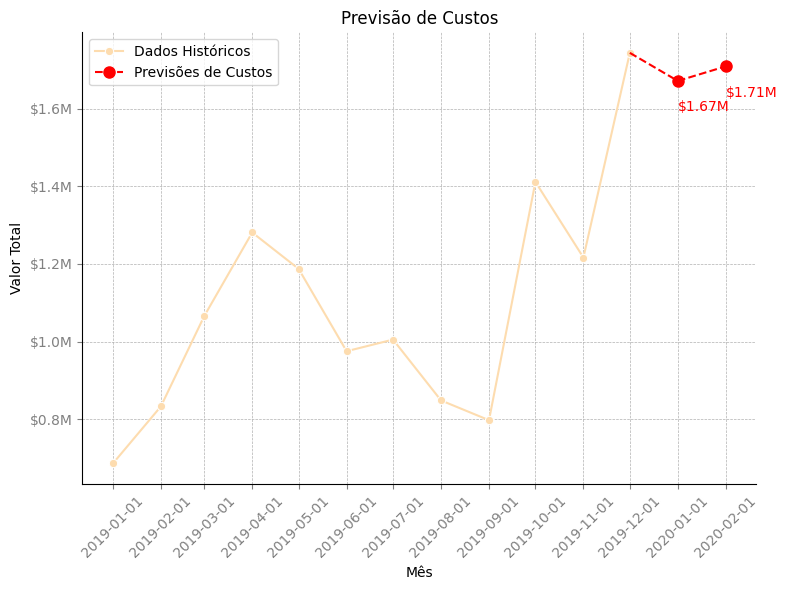

In [123]:
def millions_formatter(x, pos):
    return '${:.1f}M'.format(x * 1e-6)

def preparaDF(df):
    fig, axs = plt.subplots(figsize=(8, 6))  # Criar os eixos

    model_arima = ARIMA(df, order=(0, 1, 2))
    fit_arima = model_arima.fit()
    forecast_arima = fit_arima.forecast(steps=2) 

    sns.lineplot(x=df.index, y=df.values, label='Dados Históricos', marker='o', ax=axs)

    axs.plot(forecast_arima.index, forecast_arima.values, color='red', linestyle='--', label='Previsões de Custos', marker='o', markersize=8)
    axs.grid(True, which='both', linestyle='--', linewidth=0.5) 
    axs.plot([df.index[-1], forecast_arima.index[0]], [df.values[-1], forecast_arima.values[0]], color='red', linestyle='--')

    # Adicionar os valores nos pontos da previsão
    for i, valor in enumerate(forecast_arima.values):
        axs.text(forecast_arima.index[i], valor - 0.04 * max(forecast_arima.values), '${:.2f}M'.format(valor * 1e-6), va='center', color='red')

    axs.set_xlabel('Mês')
    axs.set_ylabel('Valor Total')
    axs.set_title('Previsão de Custos')

    axs.yaxis.set_major_formatter(FuncFormatter(millions_formatter))  
    axs.legend()
    
    
    axs.set_xticks(pd.date_range(start=df.index[0], end=forecast_arima.index[-1], freq='MS'))
    axs.tick_params(axis='x', rotation=45, colors='gray')
    axs.tick_params(axis='y', colors='gray')

    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)

    plt.tight_layout()
    plt.show()

# Supondo que df seja sua série temporal
preparaDF(custos)

In [110]:
custos

Data_Venda
2019-01-01 00:00:00                                             685906.0
2019-02-01 00:00:00                                             832908.0
2019-03-01 00:00:00                                            1065627.0
2019-04-01 00:00:00                                            1281053.0
2019-05-01 00:00:00                                            1187285.0
2019-06-01 00:00:00                                             975110.0
2019-07-01 00:00:00                                            1005091.0
2019-08-01 00:00:00                                             848324.0
2019-09-01 00:00:00                                             797376.0
2019-10-01 00:00:00                                            1411514.0
2019-11-01 00:00:00                                            1216460.0
2019-12-01 00:00:00                                            1743927.0
Data_Venda             DatetimeIndex(['2019-01-01', '2019-02-01', '20...
Name: custos, dtype: object

In [131]:
map_data = {
 '2019-01-01': 'Jan/2019',
 '2019-02-01': 'Fev/2019',
 '2019-03-01': 'Mar/2019',
 '2019-04-01': 'Abr/2019',
 '2019-05-01': 'Maio/2019',
 '2019-06-01': 'Jun/2019',
 '2019-07-01': 'Jul/2019',
 '2019-08-01': 'Ago/2019',
 '2019-09-01': 'Set/2019',
 '2019-10-01': 'Out/2019',
 '2019-11-01': 'Nov/2019',
 '2019-12-01': 'Dez/2019',
 '2020-01-01': 'Jan/2020',
 '2020-02-01': 'Fev/2020',
}

In [137]:
def millions_formatter(x, pos):
    return '${:.1f}M'.format(x * 1e-6)

def preparaDF(df):
    fig, axs = plt.subplots(figsize=(8, 6))  # Criar os eixos

    model_arima = ARIMA(df, order=(0, 1, 2))
    fit_arima = model_arima.fit()
    forecast_arima = fit_arima.forecast(steps=2) 

    sns.lineplot(x=df.index, y=df.values, label='Dados Históricos', marker='o', ax=axs)

    axs.plot(forecast_arima.index, forecast_arima.values, color='red', linestyle='--', label='Projeções de Custos', marker='o', markersize=8)
    axs.grid(True, which='both', linestyle='--', linewidth=0.3) 
    axs.plot([df.index[-1], forecast_arima.index[0]], [df.values[-1], forecast_arima.values[0]], color='red', linestyle='--')

    # Adicionar os valores nos pontos da previsão
    for i, valor in enumerate(forecast_arima.values):
        axs.text(forecast_arima.index[i], valor - 0.04 * max(forecast_arima.values), '${:.2f}M'.format(valor * 1e-6), va='center', color='red')

    axs.set_xlabel('Mês')
    axs.set_ylabel('Valor Total')
    axs.set_title('Previsão de Custos')

    axs.yaxis.set_major_formatter(FuncFormatter(millions_formatter))  
    axs.legend()
    
    axs.set_xticks([pd.Timestamp(date) for date in map_data.keys()])
    axs.set_xticklabels(map_data.values(), rotation=45, ha='right', color='gray')

    axs.tick_params(axis='y', colors='gray')

    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)

    plt.tight_layout()
    plt.show()


c:\Users\alyss\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


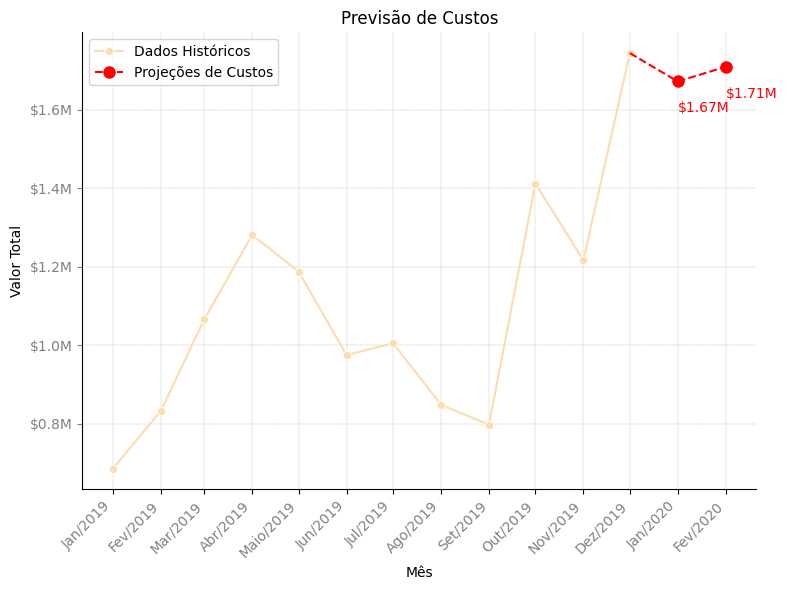

In [138]:
preparaDF(custos)

c:\Users\alyss\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


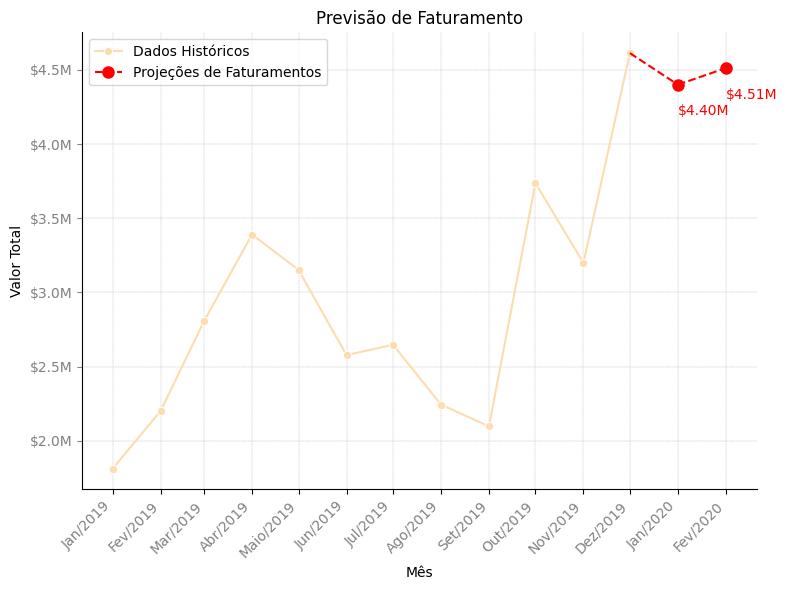

In [141]:
def preparaDF_faturamento(df):
    fig, axs = plt.subplots(figsize=(8, 6))  # Criar os eixos

    model_arima = ARIMA(df, order=(0, 1, 2))
    fit_arima = model_arima.fit()
    forecast_arima = fit_arima.forecast(steps=2) 

    sns.lineplot(x=df.index, y=df.values, label='Dados Históricos', marker='o', ax=axs)

    axs.plot(forecast_arima.index, forecast_arima.values, color='red', linestyle='--', label='Projeções de Faturamentos', marker='o', markersize=8)
    axs.grid(True, which='both', linestyle='--', linewidth=0.3) 
    axs.plot([df.index[-1], forecast_arima.index[0]], [df.values[-1], forecast_arima.values[0]], color='red', linestyle='--')

    # Adicionar os valores nos pontos da previsão
    for i, valor in enumerate(forecast_arima.values):
        axs.text(forecast_arima.index[i], valor - 0.04 * max(forecast_arima.values), '${:.2f}M'.format(valor * 1e-6), va='center', color='red')

    axs.set_xlabel('Mês')
    axs.set_ylabel('Valor Total')
    axs.set_title('Previsão de Faturamento')

    axs.yaxis.set_major_formatter(FuncFormatter(millions_formatter))  
    axs.legend()
    
    axs.set_xticks([pd.Timestamp(date) for date in map_data.keys()])
    axs.set_xticklabels(map_data.values(), rotation=45, ha='right', color='gray')

    axs.tick_params(axis='y', colors='gray')

    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)

    plt.tight_layout()
    plt.show()


preparaDF_faturamento(faturamento)

c:\Users\alyss\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


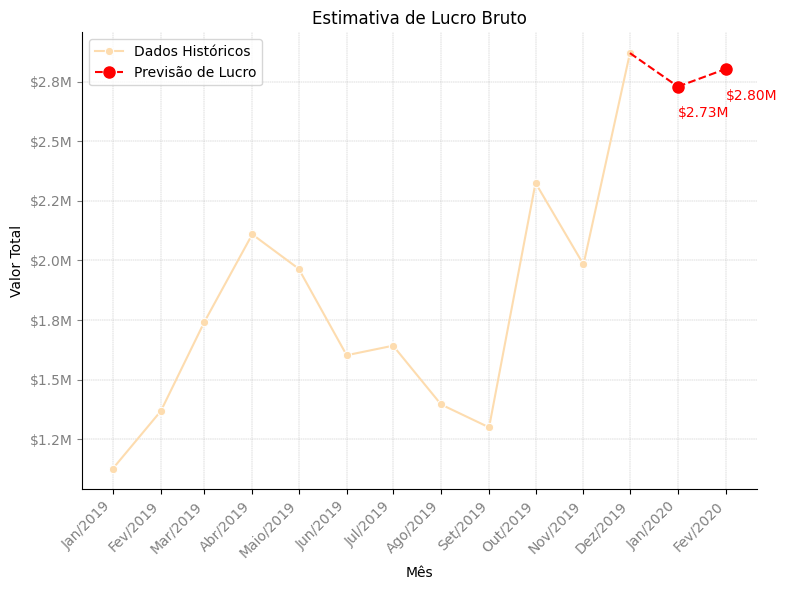

In [143]:
def preparaDF_lucro(df):
    fig, axs = plt.subplots(figsize=(8, 6))  # Criar os eixos

    model_arima = ARIMA(df, order=(0, 1, 2))
    fit_arima = model_arima.fit()
    forecast_arima = fit_arima.forecast(steps=2) 

    sns.lineplot(x=df.index, y=df.values, label='Dados Históricos', marker='o', ax=axs)

    axs.plot(forecast_arima.index, forecast_arima.values, color='red', linestyle='--', label='Previsão de Lucro', marker='o', markersize=8)
    axs.grid(True, which='both', linestyle='--', linewidth=0.3) 
    axs.plot([df.index[-1], forecast_arima.index[0]], [df.values[-1], forecast_arima.values[0]], color='red', linestyle='--')

    # Adicionar os valores nos pontos da previsão
    for i, valor in enumerate(forecast_arima.values):
        axs.text(forecast_arima.index[i], valor - 0.04 * max(forecast_arima.values), '${:.2f}M'.format(valor * 1e-6), va='center', color='red')

    axs.set_xlabel('Mês')
    axs.set_ylabel('Valor Total')
    axs.set_title('Estimativa de Lucro Bruto')

    axs.yaxis.set_major_formatter(FuncFormatter(millions_formatter))  
    axs.legend()
    
    axs.set_xticks([pd.Timestamp(date) for date in map_data.keys()])
    axs.set_xticklabels(map_data.values(), rotation=45, ha='right', color='gray')

    axs.tick_params(axis='y', colors='gray')

    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)

    plt.tight_layout()
    plt.show()


preparaDF_lucro(lucro)